#**Lab 7 - Least squares II**

Enter your code in the spaces provided. Do not change any of the variable names or function names that are already provided for you. In places where we specify the name of the return value, make sure that your code produces the a value with the correct name.

In [0]:
# Do not edit this cell.

LabID="Lab7"

**Enter your name, section number, and BYU NetID**

In [0]:
# Enter your first and last names in between the quotation marks.

first_name="Jared"

last_name="Wright"

# Enter your section number in between the quotation marks. 

section_number="2"  

# Enter your BYU NetID in between the quotation marks.  NOT YOUR BYU ID NUMBER!

BYUNetID="jaredmw2"

**Import the data set**

The simplest way to load the data into Colab is to first download it as a .csv file to your local computer by clicking the link

https://drive.google.com/open?id=1iFTaBmnv1X66BO9cV_RP7OxvUr9dNJ-l

This will take you to a page where you can download the data as a .csv file. Once it has finished downloading, execute the following cell.  This will bring up an option to choose files from your local computer to upload to Google Colab (note that the cell will not finish executing until you download the file).  Push the "Choose Files" button, and locate the file titled "Lab7data.csv" on your local computer.

In [5]:
from google.colab import files
import io

uploaded = files.upload()

Saving Lab7data.csv to Lab7data (1).csv


Now that we've uploaded the file, we will now convert it to a NumPy array called "signal_data".

In [0]:
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['Lab7data.csv'].decode('utf-8')))
signal_data=df.values
#signal_data

**Import NumPy**

In [0]:
import numpy as np

**Problem 1**

In [0]:
T=signal_data[:,0]        # Replace the value of 0 with the NumPy vector that contains all of the time values in the array signal_data (the first column).

Y=signal_data[:,1]    # Replace the value of 0 with the NumPy vector that contains all of the signal amplitude values in the array signal_data (the second column).
#T.shape
#Y.shape

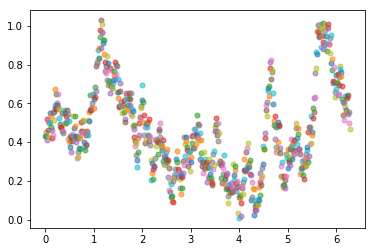

In [11]:
import matplotlib.pyplot as plt

for i in range(len(T)):
  plt.plot(T[i],Y[i],'o',markersize=5,alpha=.6)
plt.show()
# Create the plot here of the data in the vectors T and Y.

**Problem 2**

In [0]:
# This function returns the row [1,cos(t),sin(t), cos(2*t), sin(2*t) , ... , cos(n*t), sin(n*t)] of our matrix X.

def row_func(t,n):
  L=[f(k*t) for k in range(1,n+1) for f in [np.cos,np.sin]]
  L.insert(0,1)
  return L

#row_func(1,5)

**Problem 3**

In [0]:
# This function returns the matrix X, which we call the design matrix.

def design_matrix(n):
  X_matrix=[]
  for i in range(len(T)):
    X_matrix.append(row_func(T[i],n))
  X_matrix=np.array(X_matrix)
  # Put your code here, which should redefine the variable X_matrix. Do not change anything in the function definition or return statement lines.
  return X_matrix
#design_matrix(10).shape
#design_matrix(4)[100,:]

**Problem 4**

In [0]:
X2=design_matrix(2) # Replace the value of 0 with the NumPy array that is returned from the function call design_matrix(2).

**Problem 5**

In [0]:
# Replace all of the 0 values with the NumPy matrices and vectors requested in Problem 5.

normal_coef2=np.matmul(np.transpose(X2),X2)

normal_vect2=np.matmul(np.transpose(X2),Y)

beta2=np.linalg.solve(normal_coef2,normal_vect2)

#normal_coef2*beta2-normal_vect2

**Problem 6**

In [0]:
# This is our function which approximates the signal strength when n=2.

def f2(t):
  f2_val=np.dot(beta2,row_func(t,2))
  # Put your code here, which should redefine the value of f2_val. Do not change anything in the function definition or return statement lines.
  return f2_val

#f2(.75)

**Problem 7**

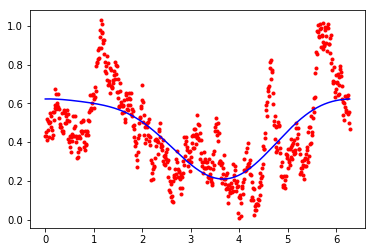

In [17]:
# Create your plot here.  
vf2=np.vectorize(f2)
plt.plot(T,Y,'r.')
plt.plot(T,vf2(T),'b-')
plt.show()

**Problem 8**

In [0]:
MSE2=(1/629)*(np.linalg.norm(Y-np.dot(X2,beta2)))**2 

#MSE2 # Replace the 0 value with the mean square error you compute in Problem 8.)

**Problem 9**

In [0]:
# Replace all of the 0 values with the NumPy matrices and vectors requested in Problem 9.

X10=design_matrix(10)

normal_coef10=np.matmul(np.transpose(X10),X10)

normal_vect10=np.matmul(np.transpose(X10),Y)

beta10=np.linalg.solve(normal_coef10,normal_vect10)

MSE10=(1/629)*(np.linalg.norm(Y-np.dot(X10,beta10)))**2 
#MSE10

In [0]:
# This is our function which approximates the signal strength when n=10.

def f10(t):
  f10_val=np.dot(beta10,row_func(t,10))
  # Put your code here which should redefine the value of the variable f10_val. Do not change anything in the function definition or return statement lines.
  return f10_val

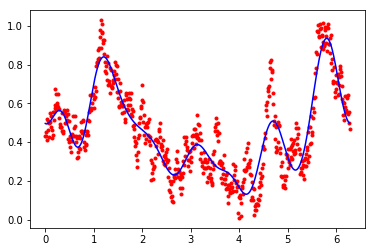

In [21]:
# Create your plot here.  
vf10=np.vectorize(f10)
plt.plot(T,Y,'r.')
plt.plot(T,vf10(T),'b-')
plt.show()

In [0]:
pred10=f10(0.105)  
#pred10# Replace the 0 value with the prediction you've been asked to compute in Problem 9.

**Problem 10**

In [0]:
# Replace all of the 0 values with the NumPy matrices and vectors requested in Problem 10.
X100=design_matrix(100)

normal_coef100=np.matmul(np.transpose(X100),X100)

normal_vect100=np.matmul(np.transpose(X100),Y)

beta100=np.linalg.solve(normal_coef100,normal_vect100)

MSE100=(1/629)*(np.linalg.norm(Y-np.dot(X100,beta100)))**2 
#MSE100


In [0]:
# This is our function which approximates the signal strength when n=100.

def f100(t):
  f100_val=np.dot(beta100,row_func(t,100))
  # Put your code here which should redefine the value of the variable f100_val. Do not change anything in the function definition or return statement lines.
  return f100_val 

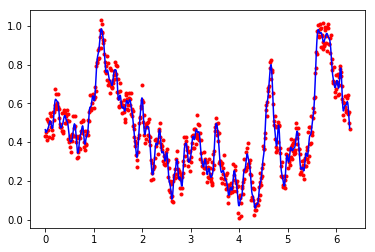

In [25]:
# Create your plot here.  
vf100=np.vectorize(f100)
plt.plot(T,Y,'r.')
plt.plot(T,vf100(T),'b-')
plt.show()

In [0]:
pred100=f100(0.105)    # Replace the 0 value with the prediction you've been asked to compute in Problem 10.

**Problem 11**

In [0]:
# Replace all of the 0 values with the NumPy matrices and vectors requested in Problem 11.
X1000=design_matrix(1000)

normal_coef1000=np.matmul(np.transpose(X1000),X1000)

normal_vect1000=np.matmul(np.transpose(X1000),Y)

beta1000=np.linalg.solve(normal_coef1000,normal_vect1000)

MSE1000=(1/629)*(np.linalg.norm(Y-np.dot(X1000,beta1000)))**2 
#MSE1000


In [0]:
# This is our function which approximates the signal strength when n=1000.

def f1000(t):
  f1000_val=np.dot(beta1000,row_func(t,1000))
  # Put your code here which should redefine the value of the variable f10_val. Do not change anything in the function definition or return statement lines.
  return f1000_val  

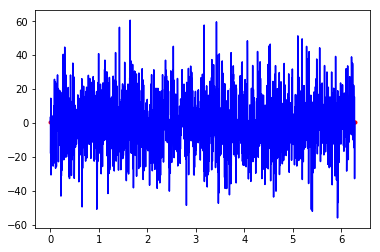

In [29]:
# Create your plot here.  
vf1000=np.vectorize(f1000)
plt.plot(T,Y,'r.')
T_fine=np.linspace(0,6.28,3000)
plt.plot(T_fine,vf1000(T_fine),'b-')
plt.show()

In [0]:
pred1000=f1000(0.105)    # Replace the 0 value with the prediction you've been asked to compute in Problem 11, again using t=0.105.

**STOP!  BEFORE YOU SUBMIT THIS LAB:**  Go to the "Runtime" menu at the top of this page, and select "Restart and run all".  If any of the cells produce error messages, you will either need to fix the error(s) or delete the code that is causing the error(s).  Then use "Restart and run all" again to see if there are any new errors.  Repeat this until no new error messages show up.   

**You are not ready to submit until you are able to select "Restart and run all" without any new error messages showing up.  Your code will not be able to be graded if there are any error messages.**